# Cat and Dog Classification using SVM

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

import os
from skimage.io import imread
from skimage.transform import resize

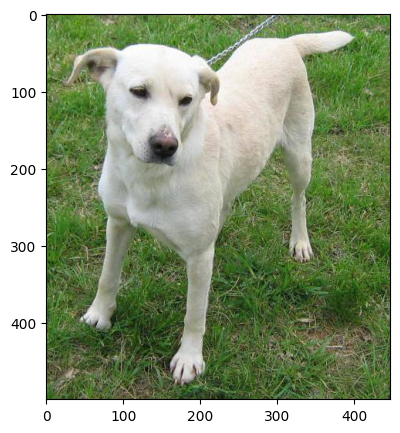

In [14]:
plt.figure(figsize=(10,5))
img1 = r"C:\test_set\dogs\dog.4891.jpg"
plt.imshow(imread(img1))

In [16]:
img_path = r"C:\test_set\dogs\dog.4891.jpg"
img = imread(img_path)
img

array([[[ 63, 106,  14],
        [ 77, 117,  28],
        [ 97, 135,  48],
        ...,
        [124, 160,  86],
        [127, 163,  89],
        [117, 153,  79]],

       [[ 88, 131,  41],
        [ 72, 112,  24],
        [ 80, 118,  33],
        ...,
        [111, 147,  73],
        [103, 140,  63],
        [125, 162,  85]],

       [[ 87, 129,  43],
        [ 73, 113,  27],
        [ 74, 112,  29],
        ...,
        [103, 141,  64],
        [ 88, 127,  48],
        [138, 177,  98]],

       ...,

       [[ 64, 110,  37],
        [ 57, 103,  30],
        [ 57, 103,  28],
        ...,
        [ 49,  58,  27],
        [ 44,  56,  20],
        [ 32,  44,   6]],

       [[ 62, 108,  35],
        [ 55, 101,  28],
        [ 56, 102,  27],
        ...,
        [ 48,  57,  26],
        [ 53,  65,  29],
        [ 52,  64,  26]],

       [[ 59, 105,  32],
        [ 53,  99,  26],
        [ 55, 101,  26],
        ...,
        [ 49,  58,  27],
        [ 66,  78,  42],
        [ 72,  84,  46]]

In [17]:
img.shape

(500, 447, 3)

In [18]:
img_resize = resize(img, (15,15))
img_resize.shape

(15, 15, 3)

In [19]:
img_resize

array([[[0.38911119, 0.53883028, 0.24976948],
        [0.38954341, 0.54674671, 0.22279049],
        [0.45236867, 0.56098107, 0.31605099],
        [0.44360525, 0.55695951, 0.32396497],
        [0.43168165, 0.56935321, 0.32682663],
        [0.42170695, 0.57193845, 0.29609896],
        [0.40310712, 0.55708834, 0.27447497],
        [0.40534599, 0.53239677, 0.28874393],
        [0.49154623, 0.5594311 , 0.41127762],
        [0.5612282 , 0.62102683, 0.50422067],
        [0.54339846, 0.62327135, 0.45273265],
        [0.56907672, 0.64101409, 0.4738607 ],
        [0.56442929, 0.63914576, 0.48130426],
        [0.43513634, 0.5549432 , 0.32995865],
        [0.3902809 , 0.52921578, 0.27254745]],

       [[0.44390183, 0.55211366, 0.29896791],
        [0.49672608, 0.57014891, 0.36885061],
        [0.57640388, 0.6130044 , 0.48499831],
        [0.7255362 , 0.77247046, 0.69146217],
        [0.81022612, 0.85092483, 0.7826223 ],
        [0.74686902, 0.80398372, 0.70092478],
        [0.59844664, 0.69018334,

In [20]:
flatten_img = img_resize.flatten()
flatten_img

array([0.38911119, 0.53883028, 0.24976948, 0.38954341, 0.54674671,
       0.22279049, 0.45236867, 0.56098107, 0.31605099, 0.44360525,
       0.55695951, 0.32396497, 0.43168165, 0.56935321, 0.32682663,
       0.42170695, 0.57193845, 0.29609896, 0.40310712, 0.55708834,
       0.27447497, 0.40534599, 0.53239677, 0.28874393, 0.49154623,
       0.5594311 , 0.41127762, 0.5612282 , 0.62102683, 0.50422067,
       0.54339846, 0.62327135, 0.45273265, 0.56907672, 0.64101409,
       0.4738607 , 0.56442929, 0.63914576, 0.48130426, 0.43513634,
       0.5549432 , 0.32995865, 0.3902809 , 0.52921578, 0.27254745,
       0.44390183, 0.55211366, 0.29896791, 0.49672608, 0.57014891,
       0.36885061, 0.57640388, 0.6130044 , 0.48499831, 0.7255362 ,
       0.77247046, 0.69146217, 0.81022612, 0.85092483, 0.7826223 ,
       0.74686902, 0.80398372, 0.70092478, 0.59844664, 0.69018334,
       0.52882807, 0.52881998, 0.62777551, 0.45901113, 0.78977179,
       0.81437207, 0.75389407, 0.88926226, 0.88256282, 0.84259

In [21]:
flatten_img.shape

(675,)

In [22]:
input_dir = r"C:\test_set"
categories = ['cats', 'dogs']
data = []
labels = []
for category_idx, category in enumerate(categories):
    for file in os.listdir(os.path.join(input_dir, category)):
        img_path = os.path.join(input_dir, category, file)
        print(img_path)
        img = imread(img_path)
        img = resize(img, (15,15))
        data.append(img.flatten())
        labels.append(category_idx)    

C:\test_set\cats\cat.4001.jpg
C:\test_set\cats\cat.4002.jpg
C:\test_set\cats\cat.4003.jpg
C:\test_set\cats\cat.4004.jpg
C:\test_set\cats\cat.4005.jpg
C:\test_set\cats\cat.4006.jpg
C:\test_set\cats\cat.4007.jpg
C:\test_set\cats\cat.4008.jpg
C:\test_set\cats\cat.4009.jpg
C:\test_set\cats\cat.4010.jpg
C:\test_set\cats\cat.4011.jpg
C:\test_set\cats\cat.4012.jpg
C:\test_set\cats\cat.4013.jpg
C:\test_set\cats\cat.4014.jpg
C:\test_set\cats\cat.4015.jpg
C:\test_set\cats\cat.4016.jpg
C:\test_set\cats\cat.4017.jpg
C:\test_set\cats\cat.4018.jpg
C:\test_set\cats\cat.4019.jpg
C:\test_set\cats\cat.4020.jpg
C:\test_set\cats\cat.4021.jpg
C:\test_set\cats\cat.4022.jpg
C:\test_set\cats\cat.4023.jpg
C:\test_set\cats\cat.4024.jpg
C:\test_set\cats\cat.4025.jpg
C:\test_set\cats\cat.4026.jpg
C:\test_set\cats\cat.4027.jpg
C:\test_set\cats\cat.4028.jpg
C:\test_set\cats\cat.4029.jpg
C:\test_set\cats\cat.4030.jpg
C:\test_set\cats\cat.4031.jpg
C:\test_set\cats\cat.4032.jpg
C:\test_set\cats\cat.4033.jpg
C:\test_se

In [23]:
data[1]

array([0.49455332, 0.47327465, 0.41579835, 0.45960165, 0.43884834,
       0.38972562, 0.41084784, 0.39092072, 0.34617174, 0.3628795 ,
       0.34705993, 0.29736049, 0.33822314, 0.32095534, 0.26825516,
       0.31766447, 0.29872341, 0.2486088 , 0.34199951, 0.30726556,
       0.23351812, 0.32740655, 0.29093812, 0.21316026, 0.36551905,
       0.30683014, 0.19713855, 0.39916555, 0.31345704, 0.20236217,
       0.28833835, 0.17949345, 0.1104213 , 0.25334435, 0.11283439,
       0.06173506, 0.31074502, 0.12356083, 0.06305852, 0.38028219,
       0.14828401, 0.06444084, 0.43458703, 0.17870038, 0.07178485,
       0.45322278, 0.4360103 , 0.39156084, 0.3172875 , 0.29101513,
       0.24941391, 0.33613407, 0.30697625, 0.26116193, 0.33128587,
       0.28081434, 0.22738559, 0.30031112, 0.22825628, 0.1657873 ,
       0.29802613, 0.22460842, 0.16432392, 0.31045938, 0.2362979 ,
       0.1713315 , 0.31252053, 0.24393091, 0.17853141, 0.32775265,
       0.2300237 , 0.15846611, 0.35289422, 0.1910449 , 0.10535

In [24]:
labels[1]

0

In [26]:
data = np.asarray(data)
labels = np.asarray(labels)

In [27]:
data

array([[0.46717939, 0.58898388, 0.64124616, ..., 0.51179056, 0.57388877,
        0.6087126 ],
       [0.49455332, 0.47327465, 0.41579835, ..., 0.40116611, 0.17388368,
        0.07268538],
       [0.19569579, 0.17964409, 0.14638953, ..., 0.57304762, 0.50764377,
        0.48233354],
       ...,
       [0.47520526, 0.40143693, 0.33460227, ..., 0.50796179, 0.45401545,
        0.39586824],
       [0.54860723, 0.54893046, 0.54503866, ..., 0.59786659, 0.62639173,
        0.60671373],
       [0.95148604, 0.95150613, 0.94981646, ..., 0.10356239, 0.10356728,
        0.09573501]], shape=(2023, 675))

In [28]:
labels

array([0, 0, 0, ..., 1, 1, 1], shape=(2023,))

In [29]:
from sklearn.model_selection import train_test_split

In [30]:
x_train, x_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, shuffle=True, stratify=labels)

# Built SVM Model for classification

In [31]:
from sklearn.svm import SVC
svm_model = SVC()

In [32]:
svm_model.fit(x_train, y_train)

SVC()

In [33]:
y_pred = svm_model.predict(x_test)
y_pred

array([0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0,
       0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1,

In [34]:
from sklearn.metrics import accuracy_score
score = accuracy_score(y_test, y_pred)
score

0.6592592592592592

In [35]:
from sklearn.model_selection import cross_val_score
cross_val_score = cross_val_score(svm_model, data, labels, cv = 5)
cross_val_score

array([0.58518519, 0.60987654, 0.64444444, 0.66336634, 0.64356436])

In [36]:
Mean_Accuracy = cross_val_score.mean()
Mean_Accuracy

np.float64(0.6292873731817626)

In [37]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.67      0.63      0.65       202
           1       0.65      0.69      0.67       203

    accuracy                           0.66       405
   macro avg       0.66      0.66      0.66       405
weighted avg       0.66      0.66      0.66       405



In [38]:
from sklearn.model_selection import GridSearchCV

In [39]:
classifer = SVC()
parameters = [{'gamma':[0.01, 0.001, 0.0001], 'C':[10, 100, 1000]}]
grid_search = GridSearchCV(classifer, parameters)
grid_search.fit(x_train, y_train)

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [10, 100, 1000],
                          'gamma': [0.01, 0.001, 0.0001]}])

In [40]:
best_estimator = grid_search.best_estimator_
best_estimator

SVC(C=10, gamma=0.01)

In [41]:
y_prediction = best_estimator.predict(x_test)
y_prediction

array([0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0,
       1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0,
       1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 1,

# Classify the Image

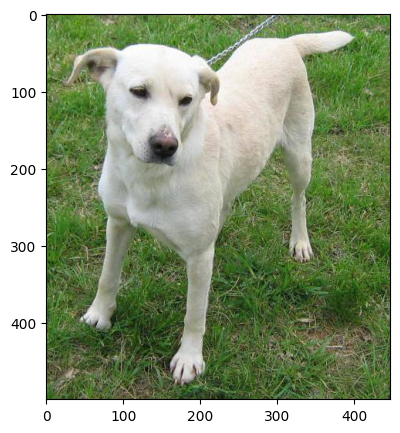

In [42]:
plt.figure(figsize=(10, 5))
img_path = r"C:\test_set\dogs\dog.4891.jpg"
plt.imshow(imread(img1))

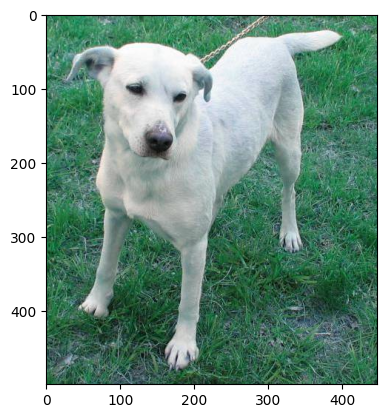

In [43]:
import cv2 as cv
img_path = cv.imread(img1)
plt.imshow(img_path)

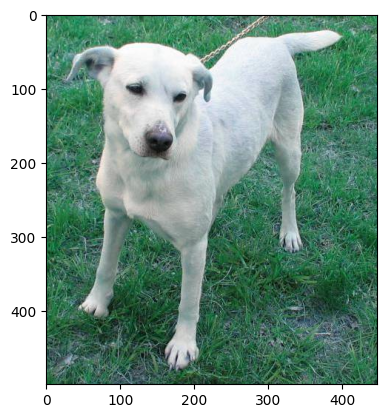

In [44]:
img_dog = r"C:\test_set\dogs\dog.4891.jpg"
img_path = cv.imread(img_dog)
plt.imshow(img_path)

In [48]:
img_dog = r"C:\test_set\dogs\dog.4891.jpg"
img_new = imread(img_dog)
img_new1 = resize(img_new, (15,15))
img_flatten = img_new1.flatten()
img_array = np.asarray(img_flatten)

result = svm_model.predict(img_array.reshape(1, -1))

if result[0] == 1:
    print("Result =", result[0])
    print("It is a dog.")
else:
    print("It is a cat.")

Result = 1
It is a dog.


In [49]:
def image_classification_prediction(image):
    img_new = imread(image)
    img_new1 = resize(img_new, (15,15))
    img_flatten = img_new1.flatten()
    img_array = np.asarray(img_flatten)
    result = svm_model.predict(img_array.reshape(1, -1))
    img_path = cv.imread(image)
    plt.imshow(img_path)
    if result[0] == 1:
        print("Result =", result[0])
        return "It is a dog"
    else:
        return "IT is a cat"
        

Result = 1


'It is a dog'

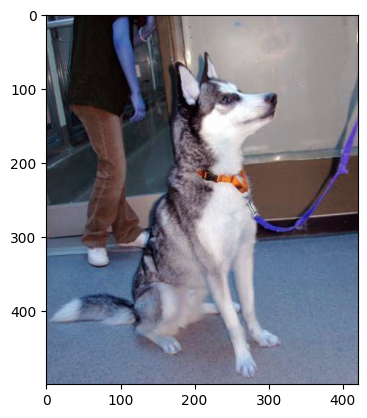

In [51]:
img2 = r"C:\test_set\dogs\dog.4001.jpg"
image_classification_prediction(img2)

'IT is a cat'

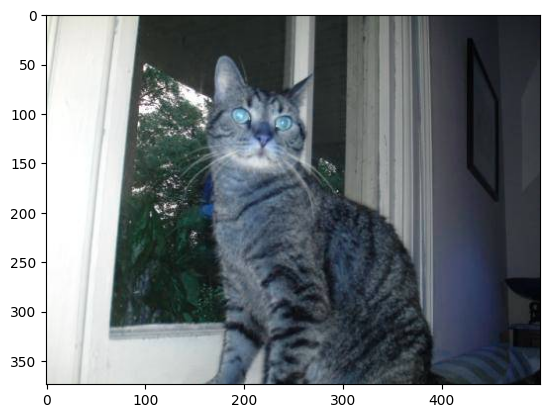

In [60]:
img2 = r"C:\test_set\cats\cat.4354.jpg"
image_classification_prediction(img2)